In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd

### Load the data

In [47]:
data = pd.read_csv("../data/alzheimers_disease_data_balanced_gpt.csv")
data = data.drop("DoctorInCharge", axis=1) # this attribute is confidential in the data, and thus not useful 
eth_col = data.pop("Ethnicity")
data.insert(3, "Ethnicity", eth_col)

data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [48]:
# Check for hallucinations
from pandas.testing import assert_frame_equal

original_data = pd.read_csv("../data/alzheimers_disease_data.csv")
original_data = original_data.drop("DoctorInCharge", axis=1)
assert_frame_equal(original_data, data[:2149])

In [49]:
data.isna().sum() # check for missing values

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

### Split the data

In [50]:
X, y = data.drop("Diagnosis", axis=1), data["Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22, stratify=y)
X_train.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
297,5048,64,1,2,2,27.927760,0,12.936216,4.059717,3.485780,...,1.692311,4.111931,0,0,9.309860,0,0,0,0,0
3242,6282,70,1,2,1,24.708731,0,14.007635,3.337996,6.227165,...,2.661018,3.046882,0,0,6.359678,0,0,0,0,0
4817,5380,67,0,3,1,28.614688,0,12.127694,8.683875,6.928702,...,17.400089,4.342769,0,0,5.674540,0,0,0,0,0
17,4768,65,1,0,1,16.333283,1,4.161795,1.306320,2.888936,...,18.049294,4.019546,0,0,2.892940,0,0,0,0,0
1891,6642,65,0,0,1,23.240145,0,18.671386,7.975633,9.844508,...,0.349789,9.047143,1,0,5.825462,1,0,0,0,0


### Train the model

In [51]:
classifier = MLPClassifier(max_iter=5000, random_state=12)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       986
           1       0.65      0.60      0.62       292

    accuracy                           0.83      1278
   macro avg       0.77      0.75      0.76      1278
weighted avg       0.83      0.83      0.83      1278



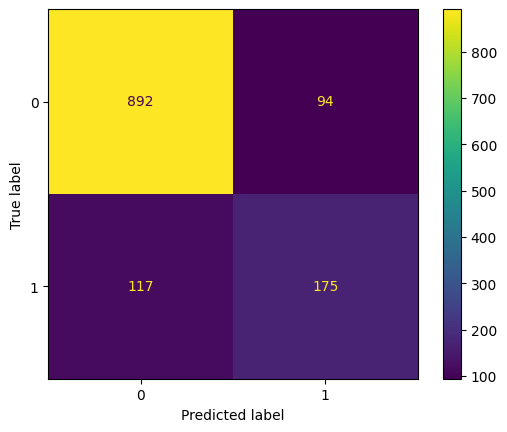

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

In [54]:
data["Ethnicity"].value_counts()

Ethnicity
0    1278
3    1278
1    1278
2    1278
Name: count, dtype: int64

### Compare performance based on ethnicity

In [55]:
# Join X_test, y_test, y_pred for analysis
results = X_test.copy()
results["TrueDiagnosis"] = y_test
results["PredictedDiagnosis"] = y_pred

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       210
           1       0.70      0.72      0.71       112

    accuracy                           0.80       322
   macro avg       0.77      0.78      0.78       322
weighted avg       0.80      0.80      0.80       322



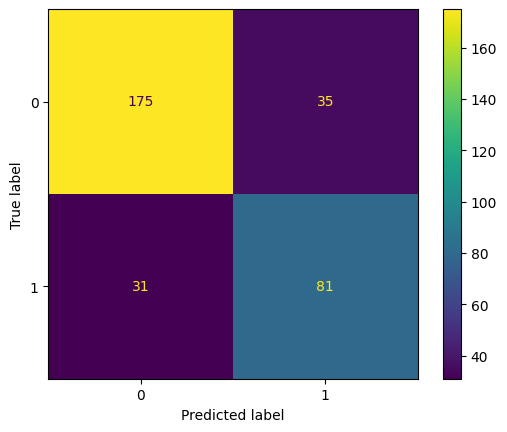

In [56]:
# Ethnicity 0
eth0_results = results[results["Ethnicity"] == 0]
print(classification_report(eth0_results["TrueDiagnosis"], eth0_results["PredictedDiagnosis"]))
cm = confusion_matrix(eth0_results["TrueDiagnosis"], eth0_results["PredictedDiagnosis"])
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       248
           1       0.55      0.71      0.62        59

    accuracy                           0.83       307
   macro avg       0.74      0.79      0.75       307
weighted avg       0.85      0.83      0.84       307



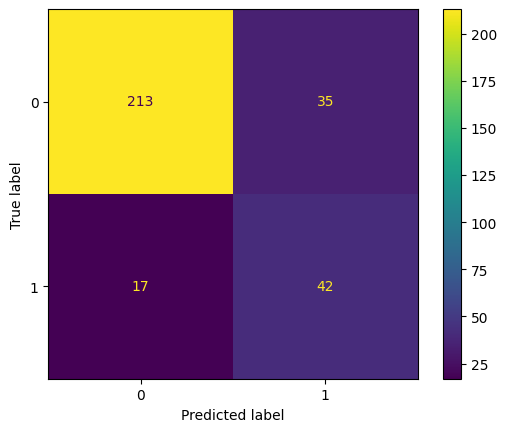

In [57]:
# Ethncity 1
eth1_results = results[results["Ethnicity"] == 1]
print(classification_report(eth1_results["TrueDiagnosis"], eth1_results["PredictedDiagnosis"]))
cm = confusion_matrix(eth1_results["TrueDiagnosis"], eth1_results["PredictedDiagnosis"])
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       233
           1       0.67      0.38      0.49        81

    accuracy                           0.79       314
   macro avg       0.74      0.66      0.68       314
weighted avg       0.78      0.79      0.77       314



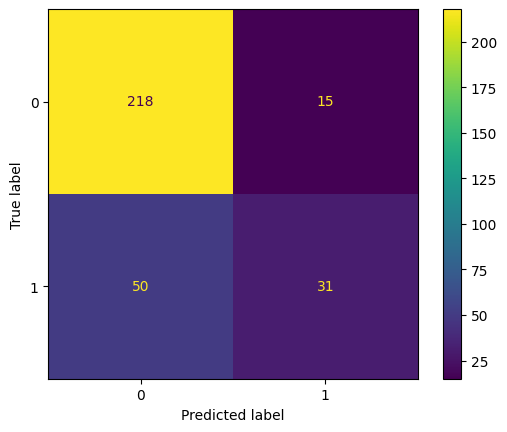

In [58]:
# Ethnicity 2
eth2_results = results[results["Ethnicity"] == 2]
print(classification_report(eth2_results["TrueDiagnosis"], eth2_results["PredictedDiagnosis"]))
cm = confusion_matrix(eth2_results["TrueDiagnosis"], eth2_results["PredictedDiagnosis"])
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       295
           1       0.70      0.53      0.60        40

    accuracy                           0.92       335
   macro avg       0.82      0.75      0.78       335
weighted avg       0.91      0.92      0.91       335



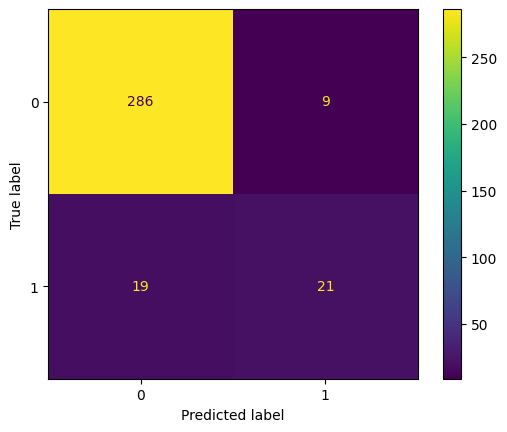

In [59]:
# Ethncity 3
eth3_results = results[results["Ethnicity"] == 3]
print(classification_report(eth3_results["TrueDiagnosis"], eth3_results["PredictedDiagnosis"]))
cm = confusion_matrix(eth3_results["TrueDiagnosis"], eth3_results["PredictedDiagnosis"])
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()